## Divyam Gupta
### TSF Task - 3 , Data Science and Business Analytics
### Exploratory Data Analysis - Retail

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Setting style for plots

In [2]:
sns.set(rc={'figure.figsize':(10,6)})
sns.set_style('darkgrid',)
sns.set_palette('Accent_r')

#### Reading dataset

In [3]:
df = pd.read_csv('SampleSuperstore.csv')
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


#### Exploratory Data Analysis

In [4]:
df.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [6]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [7]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [8]:
df['State'].nunique()

49

In [9]:
df['Sub-Category'].value_counts()

Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: Sub-Category, dtype: int64

In [10]:
df['Category'].value_counts()

Office Supplies    6026
Furniture          2121
Technology         1847
Name: Category, dtype: int64

#### Countplots for different columns

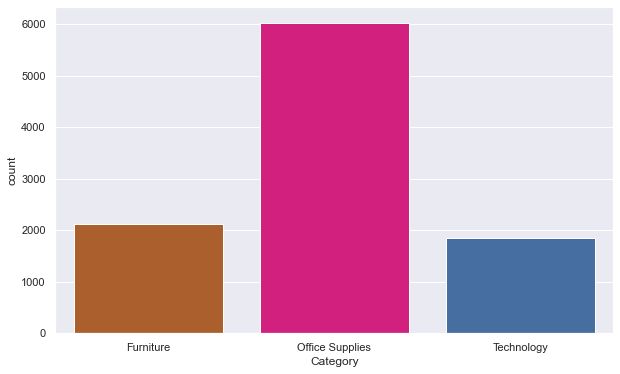

In [11]:
sns.countplot(x = 'Category',data = df)
plt.show()

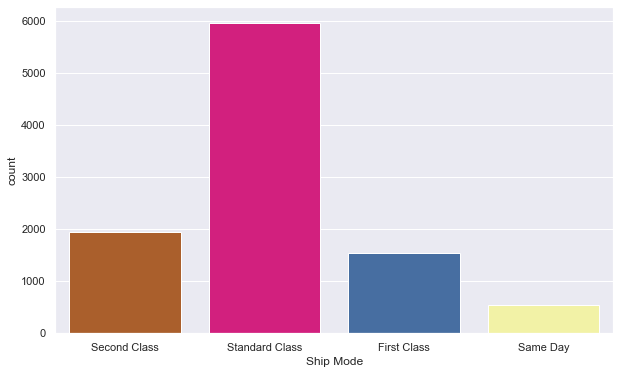

In [12]:
sns.countplot(x = 'Ship Mode',data = df)
plt.show()

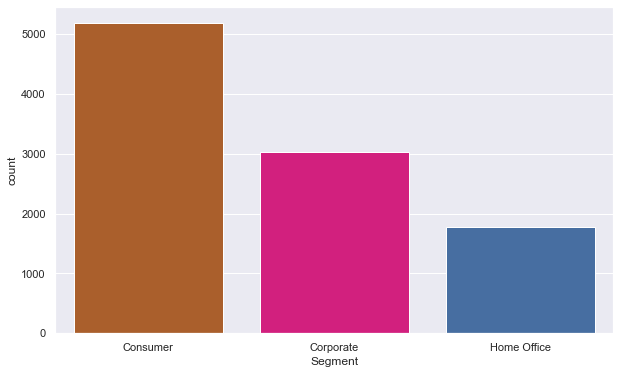

In [13]:
sns.countplot(x = 'Segment',data = df)
plt.show()

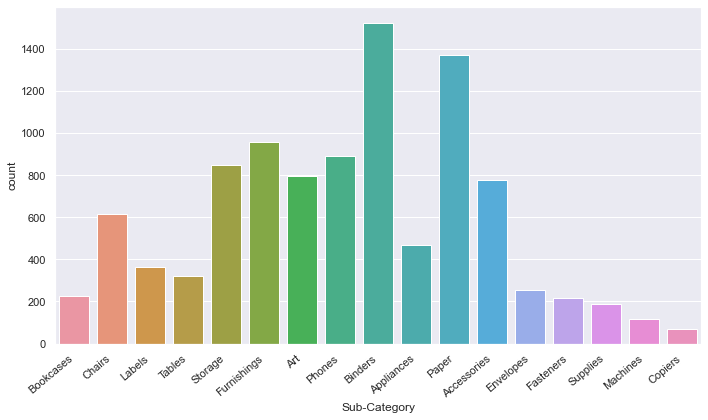

In [14]:
ax = sns.countplot(x = 'Sub-Category',data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

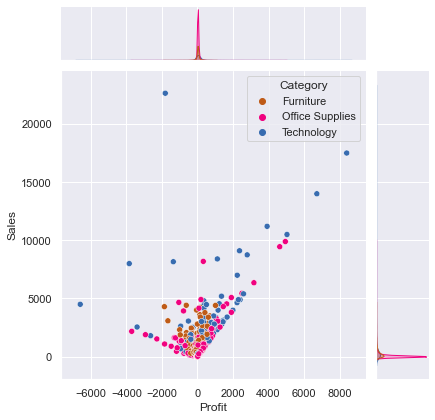

In [15]:
sns.jointplot(x = 'Profit',y = 'Sales',data = df,hue = 'Category')
plt.show()

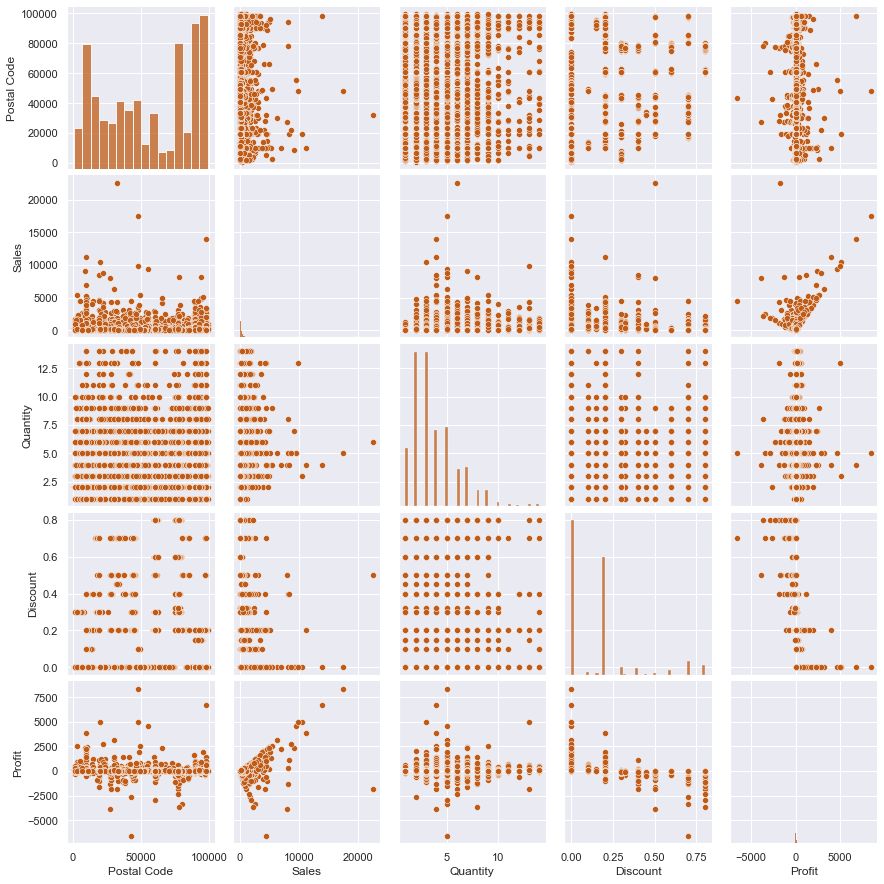

In [16]:
sns.pairplot(df)
plt.show()

#### Profit and Sales analysis based on different columns

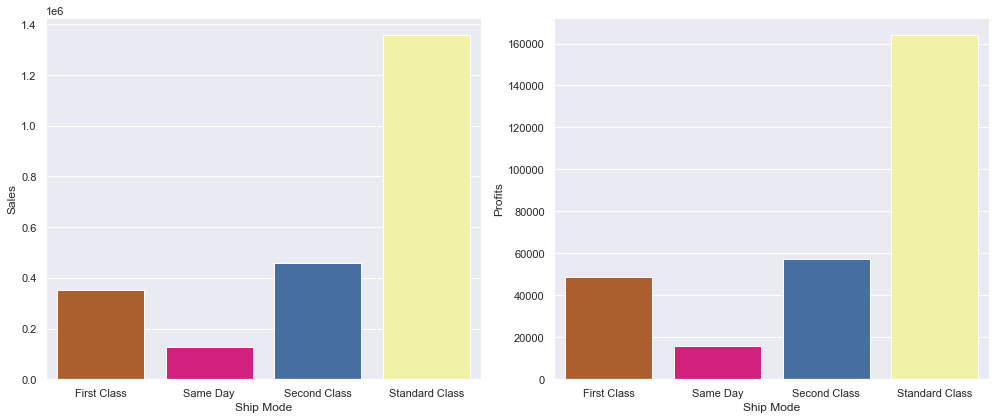

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

shipmode_sales = df.groupby('Ship Mode')['Sales'].sum()
sns.barplot(x = shipmode_sales.index,y = shipmode_sales.values ,data = df,ax = axes[0])
axes[0].set_ylabel('Sales')

shipmode_profit = df.groupby('Ship Mode')['Profit'].sum()
sns.barplot(x = shipmode_profit.index,y = shipmode_profit.values ,data = df,ax = axes[1])
axes[1].set_ylabel('Profits')

plt.tight_layout()

plt.show()

#Sales and Profits are least in Same Day shipping mode

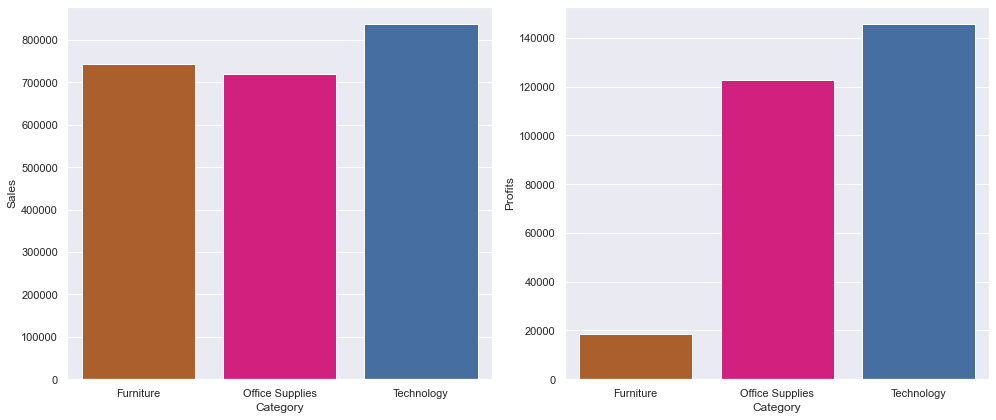

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

categorymode_sales = df.groupby('Category')['Sales'].sum()
sns.barplot(x = categorymode_sales.index,y = categorymode_sales.values ,data = df,ax = axes[0])
axes[0].set_ylabel('Sales')

category_profit = df.groupby('Category')['Profit'].sum()
sns.barplot(x = category_profit.index,y = category_profit.values ,data = df,ax = axes[1])
axes[1].set_ylabel('Profits')

plt.tight_layout()

plt.show()

#Profits needs to be increased in Furniture category

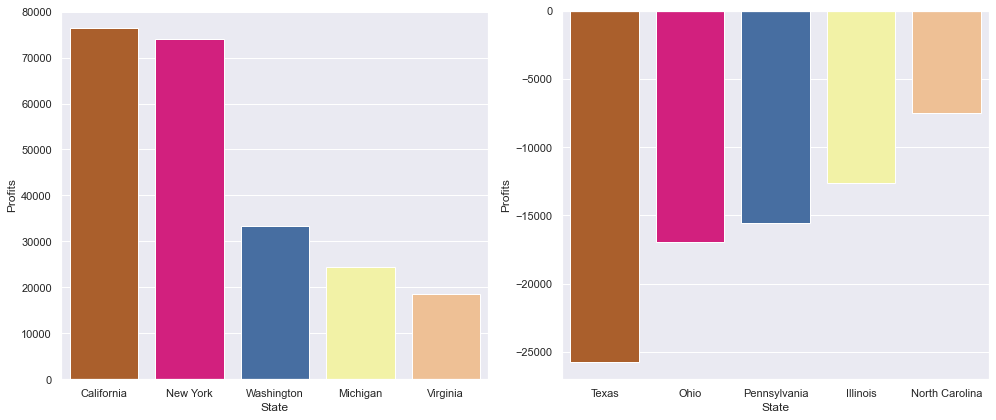

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

top_state_profit = df.groupby('State')['Profit'].sum().sort_values(ascending = False).head(5)
sns.barplot(x = top_state_profit.index,y = top_state_profit.values ,data = df,ax = axes[0])
axes[0].set_ylabel('Profits')

least_state_profit = df.groupby('State')['Profit'].sum().sort_values().head(5)
sns.barplot(x = least_state_profit.index,y = least_state_profit.values ,data = df,ax = axes[1])
axes[1].set_ylabel('Profits')

plt.tight_layout()

plt.show()

#California is most profitable state
#Texas is least profitable state

#### Correlation Heatmap

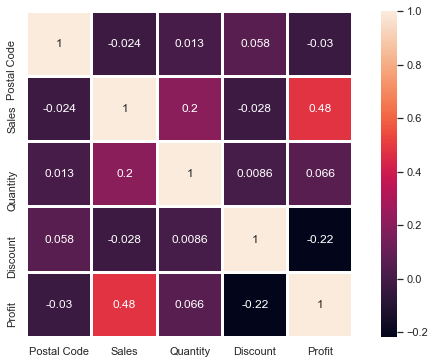

In [20]:
sns.heatmap(df.corr(),annot=True,linewidths=2,square=True)
plt.show()